In [111]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import(
    GridSearchCV,
    train_test_split
)

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error

In [22]:
df = pd.read_csv("D:\\houseprdication\\Indian_housing_Delhi_data.csv")

df

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4 BHK Villa,"5,896 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1022001,INR,4.0,2.0,NaN,NaN,Posted 2 months ago,Its four bhk villa in the super location of De...,"40,10,102",Unfurnished
4996,5 BHK Independent House,"6,521 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1549181,INR,4.0,2.0,NaN,NaN,Posted 2 months ago,A 5 bhk property is available for rent in Sund...,"54,01,015",Unfurnished
4997,3 BHK Independent Floor,"1,855 sq ft",New Friends Colony,Delhi,28.567051,77.273560,301012,INR,3.0,2.0,NaN,NaN,Posted 2 months ago,Its three bhk builder floor in the super locat...,"18,18,181",Unfurnished
4998,3 BHK Independent Floor,"2,856 sq ft",New Friends Colony,Delhi,28.567051,77.273560,301011,INR,3.0,2.0,NaN,NaN,Posted 2 months ago,Its three bhk builder floor in the super locat...,"10,10,110",Unfurnished


In [31]:
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        5000 non-null   object 
 1   house_size        5000 non-null   object 
 2   location          5000 non-null   object 
 3   city              5000 non-null   object 
 4   latitude          5000 non-null   float64
 5   longitude         5000 non-null   float64
 6   price             5000 non-null   int64  
 7   currency          5000 non-null   object 
 8   numBathrooms      4975 non-null   float64
 9   numBalconies      2737 non-null   float64
 10  isNegotiable      179 non-null    object 
 11  priceSqFt         0 non-null      float64
 12  verificationDate  5000 non-null   object 
 13  description       4715 non-null   object 
 14  SecurityDeposit   5000 non-null   object 
 15  Status            5000 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory

In [27]:
df.describe()

,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt
count,5000.000000,5000.000000,5.000000e+03,4975.000000,2737.000000,0.0
mean,28.578012,77.174499,2.221738e+05,2.918593,1.954330,NaN
std,0.190186,0.115636,2.739843e+05,1.087823,0.547219,NaN
min,20.011379,72.771332,3.000000e+03,1.000000,1.000000,NaN
25%,28.544489,77.138248,2.950000e+04,2.000000,2.000000,NaN
50%,28.569295,77.196472,1.250000e+05,3.000000,2.000000,NaN
75%,28.618687,77.228950,3.011020e+05,4.000000,2.000000,NaN
max,28.805466,80.361313,3.010101e+06,10.000000,8.000000,NaN


In [29]:
df.shape

(5000, 16)

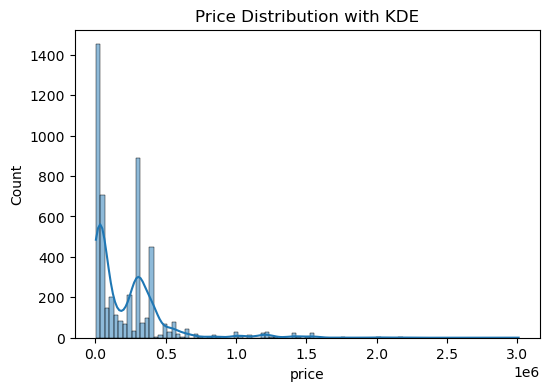

Skewness: 2.845385920876222
Kurtosis: 12.37246026743015


In [33]:
plt.figure(figsize=(6,4))
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution with KDE")
plt.show()

print("Skewness:", df['price'].skew())
print("Kurtosis:", df['price'].kurt())

In [45]:
print("\n=== BASIC STATISTICS ===")
print(df.describe(include='all'))

print("\n=== MISSING VALUES ===")
missing = df.isna().sum()
print(missing[missing > 0].sort_values(ascending=False))

print("\n=== DATA TYPES ===")
print(df.dtypes)

print("\n=== CATEGORICAL VALUES ===")
for col in df.select_dtypes(include=['object']):
        print(f"\n{col}: {df[col].nunique()} unique values")
        print(df[col].value_counts().head(5))


=== BASIC STATISTICS ===
                      house_type   house_size        location   city  \
count                       5000         5000            5000   5000   
unique                        28          339             288      1   
top     3 BHK Independent Floor   5,896 sq ft  Defence Colony  Delhi   
freq                        1567          664             189   5000   
mean                         NaN          NaN             NaN    NaN   
std                          NaN          NaN             NaN    NaN   
min                          NaN          NaN             NaN    NaN   
25%                          NaN          NaN             NaN    NaN   
50%                          NaN          NaN             NaN    NaN   
75%                          NaN          NaN             NaN    NaN   
max                          NaN          NaN             NaN    NaN   

           latitude    longitude         price currency  numBathrooms  \
count   5000.000000  5000.000000  5.

Data Glossary:
1- House Type: Type of house (e.g., apartment, villa, duplex).

2- House Size: Size of the house in square feet or square meters.

3- Location: Specific area or neighborhood where the property is located.

4- City: City in India where the property is situated.

5- Latitude: Geographic latitude coordinates of the property location.

6- Longitude: Geographic longitude coordinates of the property location.

7- Price: Rental price of the house.

8- Currency: Currency in which the price is denoted (e.g., INR - IndianRupees).

9- Number of Bathrooms: Total number of bathrooms in the house.

10- Number of Balconies: Total number of balconies in the house.

11- Negotiability: Indicates whether the price is negotiable (Yes/No).

12- Price per Square Foot: Price of the house per square foot.

13- Verification Date: Date when the rental information was verified.

14- Description: Additional description or details about the property.

15- Security Deposit: Amount of security deposit required for renting theproperty.

16- Status: Indicates the furnishing status of the property (furnished, unfur-nished, semi-furnished).

In [51]:
df['Size_split'] = df['house_size'].str.split().str[0]
df['Size_split'] = df['Size_split'].str.replace(',', '', regex=False).astype(int)

df.rename(columns={'Size_split': 'Size_ft²'}, inplace=True)

In [53]:
df['price_usd'] = df['price'] / 83
df['price_usd'] = df['price_usd'].round()

df.drop(columns=['currency','price','house_size','priceSqFt'], inplace=True)

In [57]:
df['numBalconies'] = df['numBalconies'].fillna(0).astype(int)


In [59]:
df['SecurityDeposit'] = df['SecurityDeposit'].str.replace(',', '', regex=False)
df['SecurityDeposit'] = df['SecurityDeposit'].str.strip().replace('No Deposit', '0', regex=False).astype(int)

df['SecurityDeposit'] = df['SecurityDeposit'] / 83
df['SecurityDeposit'] = df['SecurityDeposit'].round()

df.rename(columns={'SecurityDeposit': 'SecurityDeposit_usd'}, inplace=True)

In [61]:
df['isNegotiable'] = df['isNegotiable'].fillna(0)

df['isNegotiable'] = df['isNegotiable'].replace('Negotiable', 1).astype(int)

C:\Users\pc\AppData\Local\Temp\ipykernel_10388\1769977188.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['isNegotiable'] = df['isNegotiable'].replace('Negotiable', 1).astype(int)


In [63]:
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])
df['city'] = le.fit_transform(df['city'])

In [65]:
df['BHK_type'] = df['house_type'].str.split().str[1]
df['BHK'] = df['BHK_type'].map({'RK': 0, 'BHK': 1})
df['rooms_num'] = df['house_type'].str.split().str[0].astype(int)

df.drop(columns=['BHK_type'], inplace=True)

In [67]:
df['property_type'] = df['house_type'].str.split().apply(lambda x: ' '.join(x[2:4]))
df['property_type'].value_counts()
df.drop(columns=['house_type'], inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location             5000 non-null   object 
 1   city                 5000 non-null   int32  
 2   latitude             5000 non-null   float64
 3   longitude            5000 non-null   float64
 4   numBathrooms         4975 non-null   float64
 5   numBalconies         5000 non-null   int32  
 6   isNegotiable         5000 non-null   int32  
 7   verificationDate     5000 non-null   object 
 8   description          4715 non-null   object 
 9   SecurityDeposit_usd  5000 non-null   float64
 10  Status               5000 non-null   int32  
 11  Size_ft²             5000 non-null   int32  
 12  Size_ft²             5000 non-null   int32  
 13  Size_ft²             5000 non-null   int32  
 14  price_usd            5000 non-null   float64
 15  BHK                  5000 non-null   i

In [71]:
df['numBathrooms'] = df['numBathrooms'].fillna(0).astype(int)

df['location'] = df['location'].map(df['location'].value_counts())

df['property_type'] = le.fit_transform(df['property_type'])

In [73]:
def convert_to_days(time_str):

    time_part = time_str.replace('Posted ', '').replace(' ago', '')

    parts = time_part.split()

    if parts[0] == 'a' or parts[0] == 'an':
        value = 1
        unit = parts[1]
    else:
        value = int(parts[0])
        unit = parts[1]
    

    if unit == 'minute' or unit == 'minutes':
        return value / (24 * 60)
    elif unit == 'hour' or unit == 'hours':
        return value / 24
    elif unit == 'day' or unit == 'days':
        return value
    elif unit == 'month' or unit == 'months':
        return value * 30
    elif unit == 'year' or unit == 'years':
        return value * 365
    else:
        return np.nan


df['verification_days'] = df['verificationDate'].apply(convert_to_days)
data = np.array(df['verification_days'])

df.drop(columns=['description', 'verificationDate'], inplace=True)

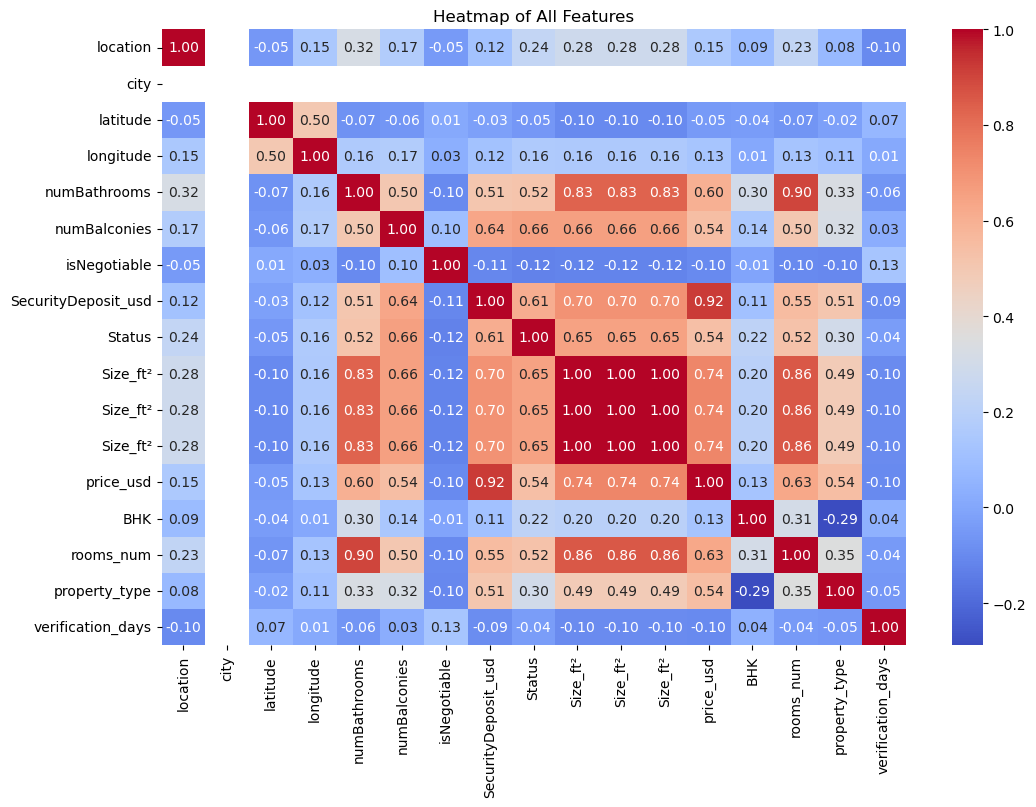

In [75]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of All Features")
plt.show()


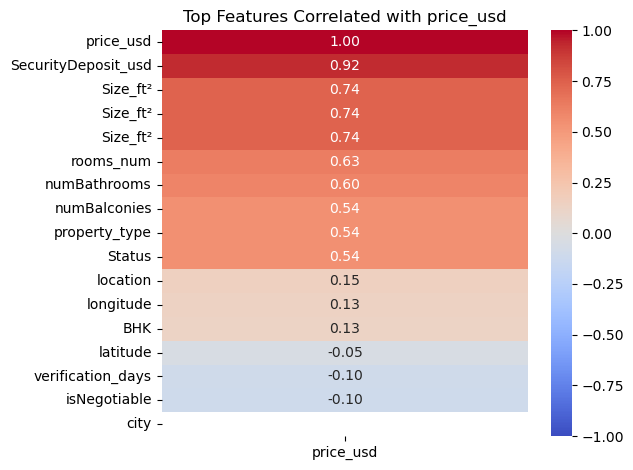

In [77]:
corr = df.corr(numeric_only=True)[['price_usd']].sort_values(by='price_usd', ascending=False)

sns.heatmap(corr.head(22),
            annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            fmt=".2f")

plt.title("Top Features Correlated with price_usd")
plt.tight_layout()
plt.show()

In [79]:
X = df.drop(columns=['price_usd'])
y = df['price_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear regression

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Train R²:", model.score(X_train, y_train) * 100)
print("Test R²:", model.score(X_test, y_test) * 100)
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)

Train R²: 88.98942644410938
Test R²: 90.36161487155164
MSE: 940739.2440658064
RMSE: 969.9171325766993


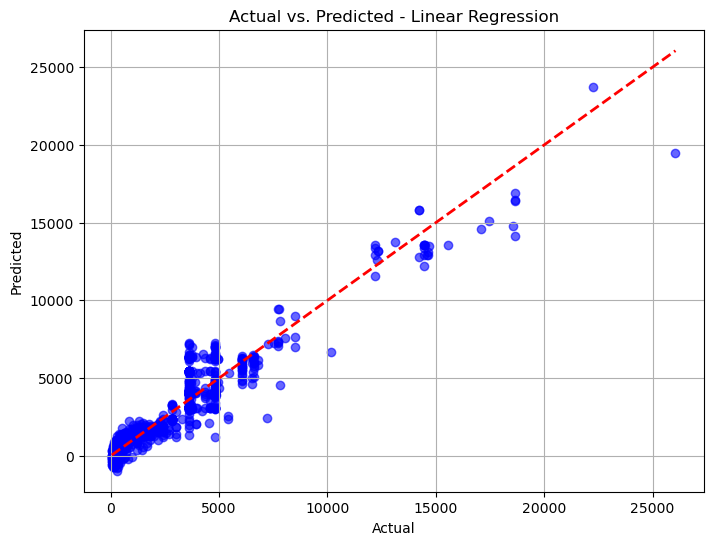

In [85]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted - Linear Regression")
plt.grid(True)
plt.show()

In [87]:
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("Train R²:", model.score(X_train, y_train) * 100)
print("Test R²:", model.score(X_test, y_test) * 100)
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)

Train R²: 99.39830327012936
Test R²: 97.28103202086739
MSE: 265380.5432383795
RMSE: 515.1509907186237


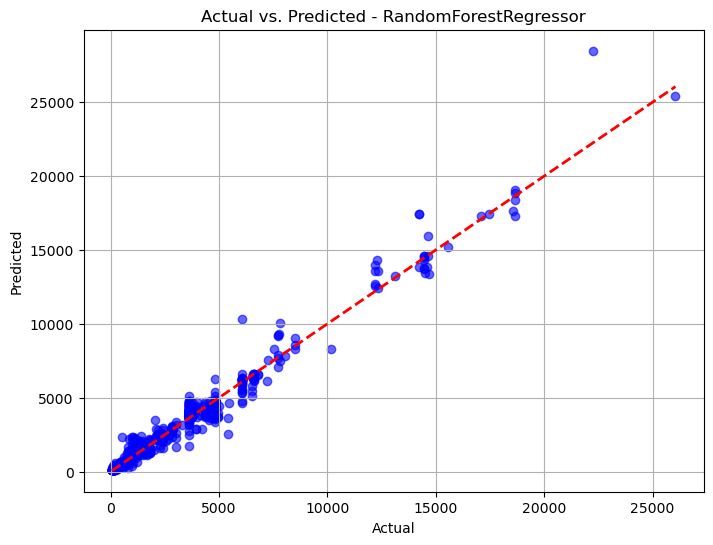

In [89]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted - RandomForestRegressor")
plt.grid(True)
plt.show()

DECISION TREE WITH GRED SEARCH 

In [98]:
param_grid = {
    'max_depth': [5, 20, 25, 30],
    'min_samples_split': [4, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}


model = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Train R²:", best_model.score(X_train, y_train) * 100)
print("Test R²:", best_model.score(X_test, y_test) * 100)
print("Best MSE:", -grid_search.best_score_)
print(f"RMSE: {(-grid_search.best_score_) ** 0.5}")



Best Parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Train R²: 99.0154311454584
Test R²: 94.54662814550674
Best MSE: 503296.71707129554
RMSE: 709.4340822594412


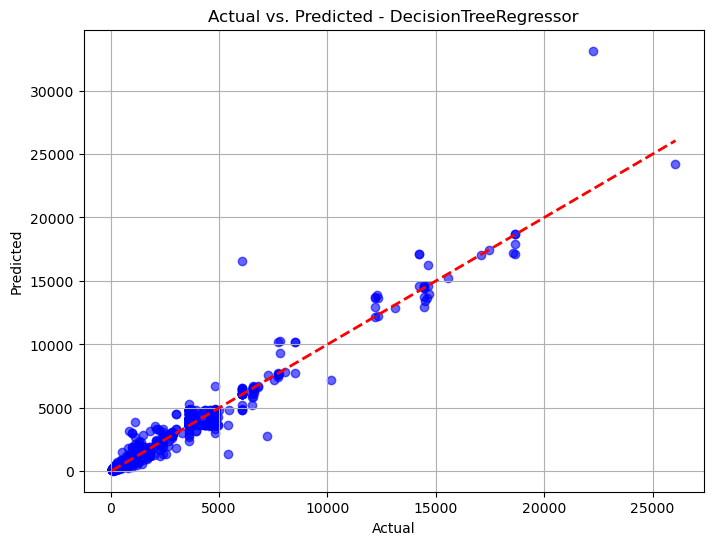

In [100]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted - DecisionTreeRegressor")
plt.grid(True)
plt.show()

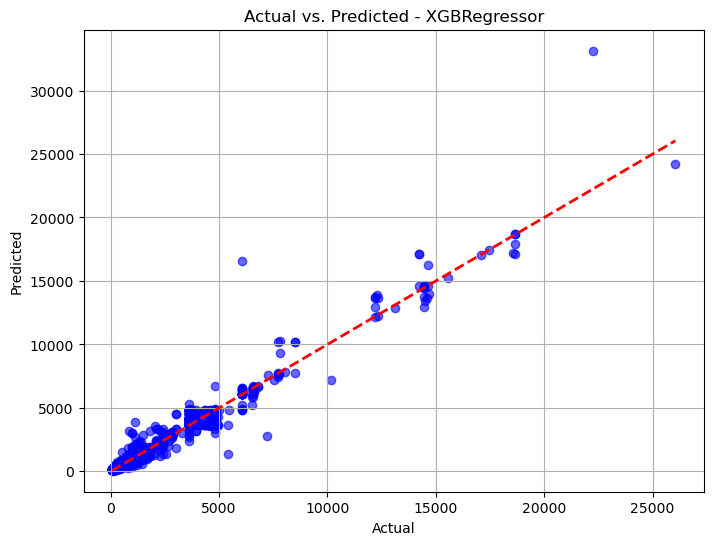

In [104]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted - XGBRegressor")
plt.grid(True)
plt.show()